In [53]:
%load_ext autoreload
%autoreload 2 
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [54]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd
import numpy as np 
import glob

In [55]:
glob.glob('../data/*')

['../data/key_1.csv',
 '../data/prophet',
 '../data/sample_submission_1.csv',
 '../data/testdf.f',
 '../data/train_1.csv']

In [56]:
full_df = pd.read_csv('../data/train_1.csv')

In [57]:
full_df.shape #days between dates is 550 so right

(145063, 551)

In [58]:
from fbprophet import Prophet

In [59]:
df = full_df.set_index('Page').T.reset_index(); df

Page,index,2NE1_zh.wikipedia.org_all-access_spider,2PM_zh.wikipedia.org_all-access_spider,3C_zh.wikipedia.org_all-access_spider,4minute_zh.wikipedia.org_all-access_spider,52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider,5566_zh.wikipedia.org_all-access_spider,91Days_zh.wikipedia.org_all-access_spider,A'N'D_zh.wikipedia.org_all-access_spider,AKB48_zh.wikipedia.org_all-access_spider,...,Drake_(músico)_es.wikipedia.org_all-access_spider,Skam_(serie_de_televisión)_es.wikipedia.org_all-access_spider,Legión_(serie_de_televisión)_es.wikipedia.org_all-access_spider,Doble_tentación_es.wikipedia.org_all-access_spider,Mi_adorable_maldición_es.wikipedia.org_all-access_spider,Underworld_(serie_de_películas)_es.wikipedia.org_all-access_spider,Resident_Evil:_Capítulo_Final_es.wikipedia.org_all-access_spider,Enamorándome_de_Ramón_es.wikipedia.org_all-access_spider,Hasta_el_último_hombre_es.wikipedia.org_all-access_spider,Francisco_el_matemático_(serie_de_televisión_de_2017)_es.wikipedia.org_all-access_spider
0,2015-07-01,18.0,11.0,1.0,35.0,NaN,12.0,NaN,118.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-07-02,11.0,14.0,0.0,13.0,NaN,7.0,NaN,26.0,23.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-07-03,5.0,15.0,1.0,10.0,NaN,4.0,NaN,30.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-07-04,13.0,18.0,1.0,94.0,NaN,5.0,NaN,24.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-07-05,14.0,11.0,0.0,4.0,NaN,20.0,NaN,29.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2015-07-06,9.0,13.0,4.0,26.0,NaN,8.0,NaN,127.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2015-07-07,9.0,22.0,0.0,14.0,NaN,5.0,NaN,53.0,35.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2015-07-08,22.0,11.0,3.0,9.0,NaN,17.0,NaN,37.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2015-07-09,26.0,10.0,4.0,11.0,NaN,24.0,NaN,20.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2015-07-10,24.0,4.0,4.0,16.0,NaN,7.0,NaN,32.0,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Columns: 145064 entries, index to Francisco_el_matemático_(serie_de_televisión_de_2017)_es.wikipedia.org_all-access_spider
dtypes: float64(145063), object(1)
memory usage: 608.7+ MB


In [61]:
df = df.rename(columns={'index':'ds'})

In [62]:
df['ds'] = pd.to_datetime(df.ds)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Columns: 145064 entries, ds to Francisco_el_matemático_(serie_de_televisión_de_2017)_es.wikipedia.org_all-access_spider
dtypes: datetime64[ns](1), float64(145063)
memory usage: 608.7 MB


In [64]:
testdf = df.iloc[:,[0,1500]]; testdf

Page,ds,李正信_zh.wikipedia.org_all-access_spider
0,2015-07-01,0.0
1,2015-07-02,4.0
2,2015-07-03,3.0
3,2015-07-04,7.0
4,2015-07-05,6.0
5,2015-07-06,1.0
6,2015-07-07,2.0
7,2015-07-08,0.0
8,2015-07-09,1.0
9,2015-07-10,8.0


In [65]:
print('李正信_zh.wikipedia.org_all-access_spider')

李正信_zh.wikipedia.org_all-access_spider


In [66]:
import pickle

In [67]:
pickle.dump(testdf, open('李正信_zh.wikipedia.org_all-access_spider', 'wb'))

In [68]:
testdf.columns = ['ds','y']

In [69]:
traindf = testdf.iloc[:-60]

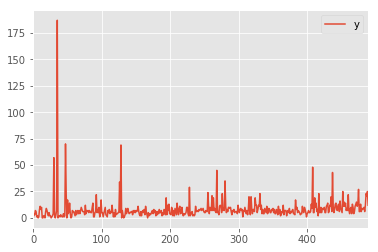

In [70]:
traindf.plot()

In [71]:
#traindf.loc[traindf.y > traindf.y.quantile(.95), ['y']] = None

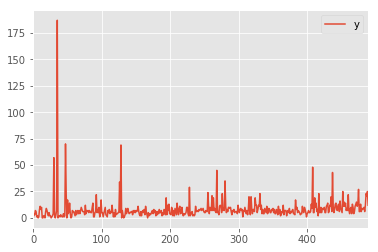

In [72]:
traindf.plot()

In [73]:
m = Prophet(yearly_seasonality=True)
m.fit(traindf)

In [74]:
tdf = m.make_future_dataframe(periods=60); tdf.tail()

,ds
545,2016-12-27
546,2016-12-28
547,2016-12-29
548,2016-12-30
549,2016-12-31


In [75]:
forecast = m.predict(tdf)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
545,2016-12-27,6.251879,-8.019934,18.780534
546,2016-12-28,9.559688,-3.721651,22.570035
547,2016-12-29,6.974036,-7.681279,21.026667
548,2016-12-30,9.337282,-4.747380,22.530466
549,2016-12-31,7.321359,-6.357805,21.404565


In [76]:
testdf.tail()

,ds,y
545,2016-12-27,8.0
546,2016-12-28,8.0
547,2016-12-29,10.0
548,2016-12-30,8.0
549,2016-12-31,10.0


In [77]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 2 columns):
ds    550 non-null datetime64[ns]
y     550 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.7 KB


In [78]:
forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 17 columns):
ds                550 non-null datetime64[ns]
t                 550 non-null float64
trend             550 non-null float64
seasonal_lower    550 non-null float64
seasonal_upper    550 non-null float64
trend_lower       550 non-null float64
trend_upper       550 non-null float64
yhat_lower        550 non-null float64
yhat_upper        550 non-null float64
weekly            550 non-null float64
weekly_lower      550 non-null float64
weekly_upper      550 non-null float64
yearly            550 non-null float64
yearly_lower      550 non-null float64
yearly_upper      550 non-null float64
seasonal          550 non-null float64
yhat              550 non-null float64
dtypes: datetime64[ns](1), float64(16)
memory usage: 73.1 KB


In [79]:
forecast.merge(testdf, on='ds', how='inner')

,ds,t,trend,seasonal_lower,seasonal_upper,trend_lower,trend_upper,yhat_lower,yhat_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,seasonal,yhat,y
0,2015-07-01,0.000000,6.703927,-0.351210,-0.351210,6.703927,6.703927,-6.970706,19.503864,1.988185,1.988185,1.988185,-2.339395,-2.339395,-2.339395,-0.351210,6.352717,0.0
1,2015-07-02,0.002045,6.707764,-3.108916,-3.108916,6.707764,6.707764,-10.769842,17.477828,-0.684833,-0.684833,-0.684833,-2.424083,-2.424083,-2.424083,-3.108916,3.598848,4.0
2,2015-07-03,0.004090,6.711601,-0.938147,-0.938147,6.711601,6.711601,-8.630784,19.624119,1.584056,1.584056,1.584056,-2.522203,-2.522203,-2.522203,-0.938147,5.773454,3.0
3,2015-07-04,0.006135,6.715439,-3.163316,-3.163316,6.715439,6.715439,-9.498305,16.947526,-0.532315,-0.532315,-0.532315,-2.631001,-2.631001,-2.631001,-3.163316,3.552123,7.0
4,2015-07-05,0.008180,6.719276,-3.467592,-3.467592,6.719276,6.719276,-10.194321,17.381837,-0.720520,-0.720520,-0.720520,-2.747072,-2.747072,-2.747072,-3.467592,3.251684,6.0
5,2015-07-06,0.010225,6.723113,-3.261033,-3.261033,6.723113,6.723113,-9.799338,16.834219,-0.394602,-0.394602,-0.394602,-2.866431,-2.866431,-2.866431,-3.261033,3.462080,1.0
6,2015-07-07,0.012270,6.726951,-4.224583,-4.224583,6.726951,6.726951,-10.919942,15.950004,-1.239971,-1.239971,-1.239971,-2.984612,-2.984612,-2.984612,-4.224583,2.502368,2.0
7,2015-07-08,0.014315,6.730788,-1.108580,-1.108580,6.730788,6.730788,-7.699502,19.310206,1.988185,1.988185,1.988185,-3.096765,-3.096765,-3.096765,-1.108580,5.622208,0.0
8,2015-07-09,0.016360,6.734625,-3.882621,-3.882621,6.734625,6.734625,-10.969374,17.636446,-0.684833,-0.684833,-0.684833,-3.197788,-3.197788,-3.197788,-3.882621,2.852004,1.0
9,2015-07-10,0.018405,6.738463,-1.698389,-1.698389,6.738463,6.738463,-8.593415,18.666433,1.584056,1.584056,1.584056,-3.282445,-3.282445,-3.282445,-1.698389,5.040073,8.0


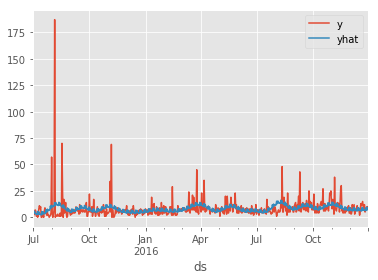

In [80]:
forecast.merge(testdf, on='ds', how='inner').set_index('ds').loc[:,['y','yhat']].plot()

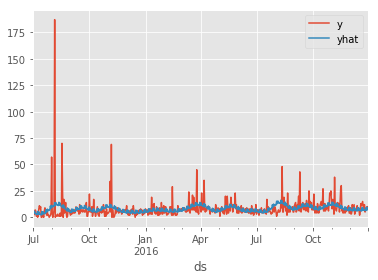

In [81]:
forecast.merge(testdf, on='ds', how='inner').set_index('ds').loc[:,['y','yhat']].plot()

In [113]:
forecast.join(testdf.y)

,ds,t,trend,seasonal_lower,seasonal_upper,trend_lower,trend_upper,yhat_lower,yhat_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,seasonal,yhat,y
0,2015-07-01,0.000000,6.703927,-0.351210,-0.351210,6.703927,6.703927,-7.067429,20.273509,1.988185,1.988185,1.988185,-2.339395,-2.339395,-2.339395,-0.351210,6.352717,0.0
1,2015-07-02,0.002045,6.707764,-3.108916,-3.108916,6.707764,6.707764,-10.162242,17.224186,-0.684833,-0.684833,-0.684833,-2.424083,-2.424083,-2.424083,-3.108916,3.598848,4.0
2,2015-07-03,0.004090,6.711601,-0.938147,-0.938147,6.711601,6.711601,-7.679148,18.943620,1.584056,1.584056,1.584056,-2.522203,-2.522203,-2.522203,-0.938147,5.773454,3.0
3,2015-07-04,0.006135,6.715439,-3.163316,-3.163316,6.715439,6.715439,-9.808784,17.578956,-0.532315,-0.532315,-0.532315,-2.631001,-2.631001,-2.631001,-3.163316,3.552123,7.0
4,2015-07-05,0.008180,6.719276,-3.467592,-3.467592,6.719276,6.719276,-10.592501,18.044395,-0.720520,-0.720520,-0.720520,-2.747072,-2.747072,-2.747072,-3.467592,3.251684,6.0
5,2015-07-06,0.010225,6.723113,-3.261033,-3.261033,6.723113,6.723113,-9.712348,16.441136,-0.394602,-0.394602,-0.394602,-2.866431,-2.866431,-2.866431,-3.261033,3.462080,1.0
6,2015-07-07,0.012270,6.726951,-4.224583,-4.224583,6.726951,6.726951,-10.798042,16.449508,-1.239971,-1.239971,-1.239971,-2.984612,-2.984612,-2.984612,-4.224583,2.502368,2.0
7,2015-07-08,0.014315,6.730788,-1.108580,-1.108580,6.730788,6.730788,-8.200551,19.362932,1.988185,1.988185,1.988185,-3.096765,-3.096765,-3.096765,-1.108580,5.622208,0.0
8,2015-07-09,0.016360,6.734625,-3.882621,-3.882621,6.734625,6.734625,-12.175823,16.287749,-0.684833,-0.684833,-0.684833,-3.197788,-3.197788,-3.197788,-3.882621,2.852004,1.0
9,2015-07-10,0.018405,6.738463,-1.698389,-1.698389,6.738463,6.738463,-8.447695,18.465779,1.584056,1.584056,1.584056,-3.282445,-3.282445,-3.282445,-1.698389,5.040073,8.0


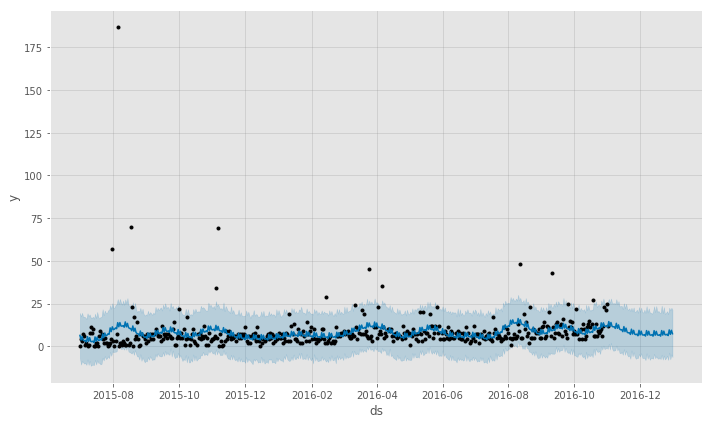

In [82]:
m.plot(forecast);

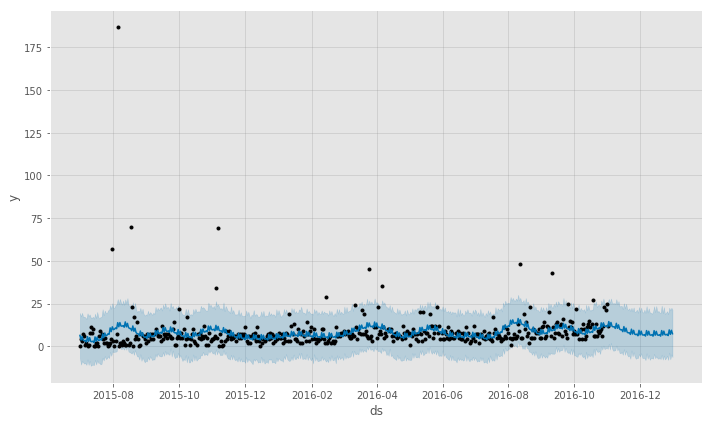

In [83]:
m.plot(forecast);

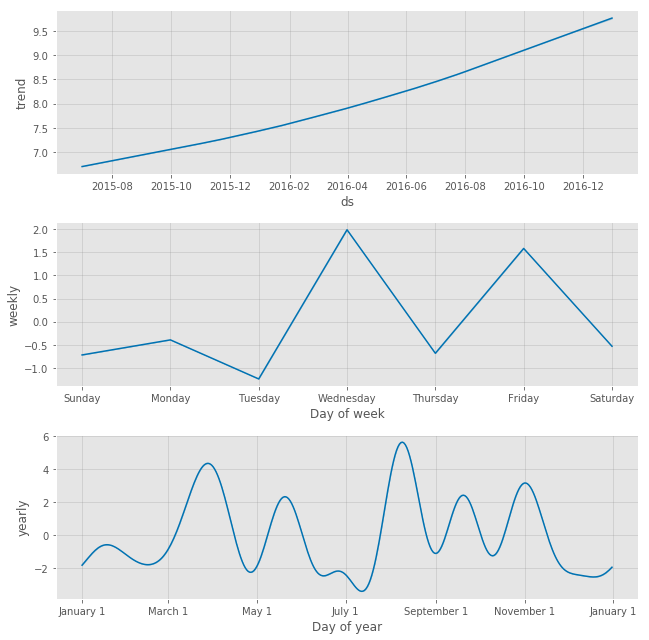

In [84]:
m.plot_components(forecast);

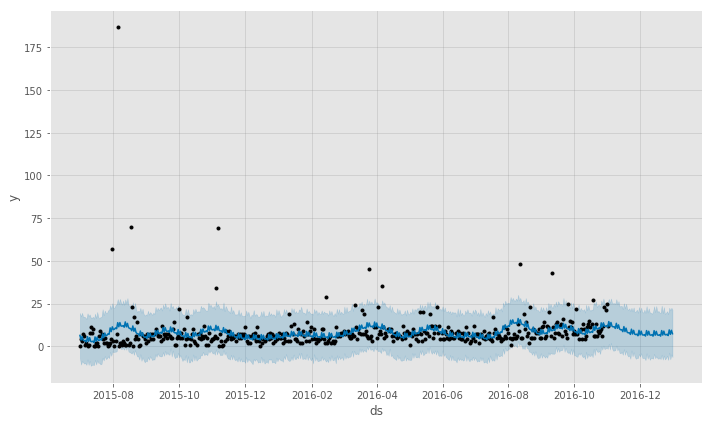

In [85]:
m.plot(forecast);

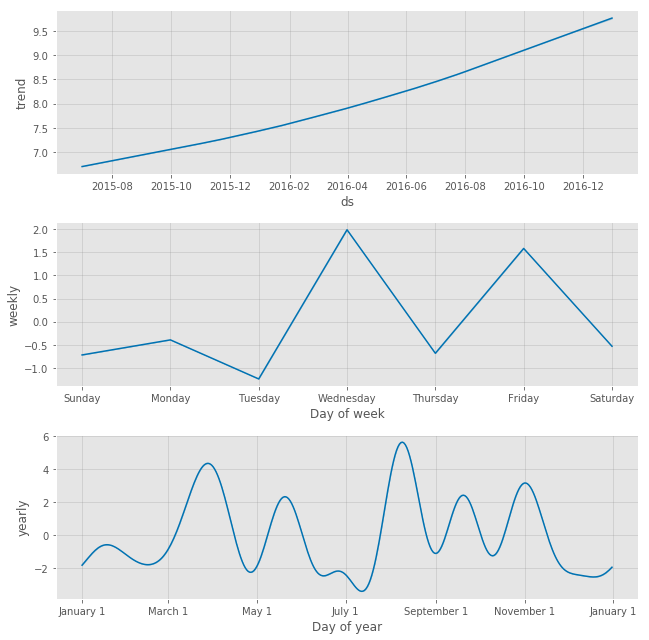

In [86]:
m.plot_components(forecast);

In [87]:
tdf = m.make_future_dataframe(periods=60); tdf.tail()

,ds
545,2016-12-27
546,2016-12-28
547,2016-12-29
548,2016-12-30
549,2016-12-31


In [88]:
forecast = m.predict(tdf)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
545,2016-12-27,6.251879,-7.766827,19.530435
546,2016-12-28,9.559688,-2.896418,23.681769
547,2016-12-29,6.974036,-6.821734,20.198707
548,2016-12-30,9.337282,-3.750463,23.055691
549,2016-12-31,7.321359,-6.306784,19.961187


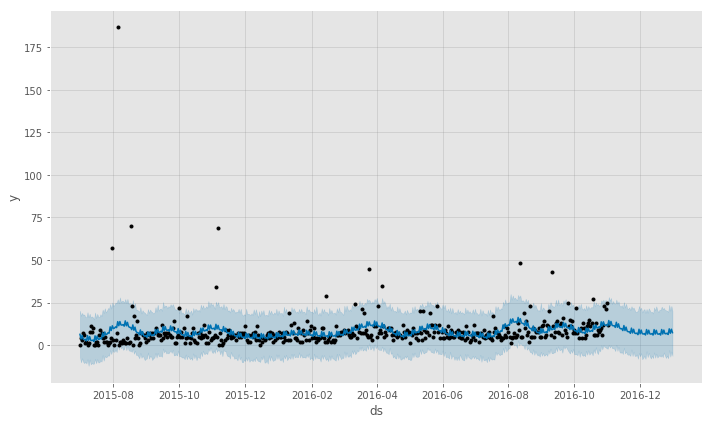

In [89]:
m.plot(forecast);

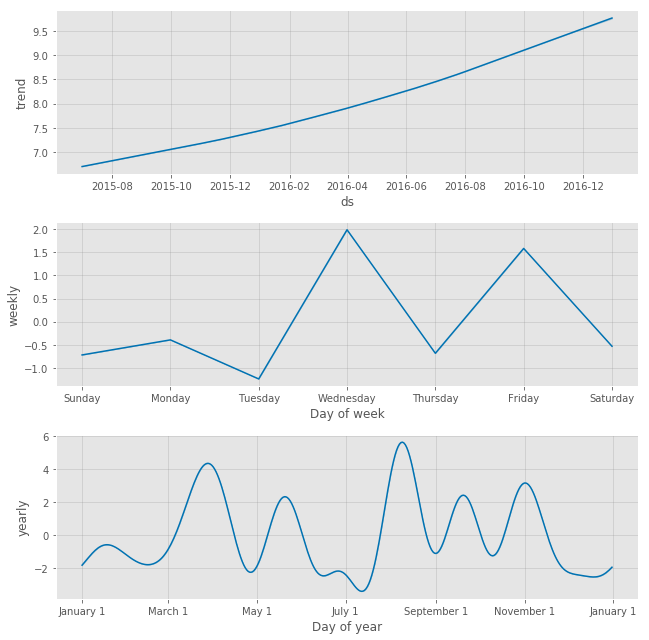

In [90]:
m.plot_components(forecast);

In [93]:
import pickle
from sklearn.externals import joblib

In [95]:
pickle.DEFAULT_PROTOCOL

3

In [97]:
m

In [98]:
joblib

<module 'sklearn.externals.joblib' from '/Users/dbcerigo/miniconda3/envs/basePy3/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py'>

In [107]:
%%timeit
with open('../data/testpickle.pk', 'wb')as file:
    pickle.dump(m,file)

920 µs ± 31.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [108]:
%%timeit
with open('../data/testpickle.pk', 'rb')as file:
    m2 = pickle.load(file)

433 µs ± 5.77 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [109]:
%%timeit
joblib.dump(m,'../data/testjoblibdump.jld',protocol=3)

3.86 ms ± 101 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [110]:
%%timeit
m2 = joblib.load('../data/testjoblibdump.jld')

2.19 ms ± 52.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
